In [1]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import umap
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

Turbine_Data_Kelmarsh_1_2016-01-03_-_2017-01-01_228.csv (die "Roh"-Daten)
und
Status_Kelmarsh_1_2016-01-03_-_2017-01-01_228.csv (die Ausfälle)

In [3]:
# Pfad zum Verzeichnis mit den CSV-Dateien  
path = "bla"

# Liste zum Speichern der DataFrames
dfs = []

# Liste zum Speichern der Dateinamen der CSV-Dateien  
csv_files = [file for file in os.listdir(path) if file.endswith(".csv")]

# Definieren Sie die Größe der Chunks (Anzahl der Zeilen)
chunk_size = 5000  # Anpassen basierend auf der erwarteten Dateigröße und Speicherkapazität

for file in csv_files:
    file_path = os.path.join(path, file)
    try:
        # Lese die Datei chunkweise ein und speichere jeden Chunk temporär
        chunk_list = [chunk for chunk in pd.read_csv(file_path, header=9, chunksize=chunk_size)]
        # Füge den gesamten Inhalt der Datei der Liste `dfs` hinzu
        dfs.extend(chunk_list)
    except Exception as e:
        print(f"Ein Fehler ist beim Einlesen von {file} aufgetreten: {e}")

# Alle gesammelten DataFrames verketten
result = pd.concat(dfs, ignore_index=True)

# Anzeigen oder Weiterverarbeitung des Ergebnis-DataFrames
result

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
0,2016-01-03 00:00:00,NaN,NaN,NaN,NaN,7.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-03 00:10:00,NaN,NaN,NaN,NaN,7.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03 00:20:00,NaN,NaN,NaN,NaN,7.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-03 00:30:00,NaN,NaN,NaN,NaN,7.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-03 00:40:00,NaN,NaN,NaN,NaN,7.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733179,2020-12-31 23:10:00,4.676179,0.327718,4.051514,5.282950,7.0,4.810768,0.266501,4.054437,5.222122,...,6.896102,2.975049,21.911283,1.449405,11.479320,2.659324,2.659324,0.0,5.743777,3.136576
1733180,2020-12-31 23:20:00,4.597084,0.322521,4.079358,5.320075,7.0,4.516499,0.272966,3.846276,4.978808,...,7.938308,5.079484,29.872223,2.112323,18.544922,2.747988,2.747988,0.0,6.236207,4.047875
1733181,2020-12-31 23:30:00,4.731310,0.460699,3.805375,5.560645,7.0,4.654125,0.233220,4.150829,5.172965,...,8.319322,3.586326,29.925547,1.484774,18.457911,2.635697,2.635697,0.0,7.140164,4.579907
1733182,2020-12-31 23:40:00,4.564136,0.338333,3.656875,5.018620,7.0,4.667925,0.312302,3.936625,5.174887,...,6.720812,3.304000,20.011698,3.119849,17.889269,2.546526,2.546526,0.0,4.379587,3.369950


In [5]:
(result.isna().sum())/len(result)

# Date and time                             0.000000
Wind speed (m/s)                            0.027577
Wind speed, Standard deviation (m/s)        0.325482
Wind speed, Minimum (m/s)                   0.325483
Wind speed, Maximum (m/s)                   0.325482
                                              ...   
Drive train acceleration, Max (mm/ss)       0.742758
Drive train acceleration, Min (mm/ss)       0.742758
Drive train acceleration, StdDev (mm/ss)    0.742758
Tower Acceleration X, StdDev (mm/ss)        0.750263
Tower Acceleration Y, StdDev (mm/ss)        0.750263
Length: 299, dtype: float64

In [6]:
# Berechnen des Anteils der fehlenden Werte pro Spalte
missing_ratio = (result.isna().sum())/len(result)

# Sortieren der Werte in absteigender Reihenfolge
sorted_missing_ratio = missing_ratio.sort_values(ascending=True)

# Ausgabe des sortierten Ergebnisses
print(sorted_missing_ratio)

# Date and time                                     0.0
Available Capacity for Production (Planned) (kW)    0.0
Energy Budget - Default (kWh)                       0.0
Long Term Wind (m/s)                                0.0
Data Availability                                   0.0
                                                   ... 
Lost Production (Contractual Custom) (kWh)          1.0
Lost Production (Contractual Global) (kWh)          1.0
Equivalent Full Load Hours counter (s)              1.0
Time-based Contractual Avail. (Custom)              1.0
Production-based Contractual Avail. (Custom)        1.0
Length: 299, dtype: float64


In [7]:
(result.isna().sum()/len(result)<0.1).sum()

100

In [8]:
sorted_missing_ratio.to_csv("nan_anteil.csv")

In [9]:
df = result[['Long Term Wind (m/s)', 'Potential power reference turbines (kW)', 'Energy Export (kWh)', 
                  'Available Capacity for Production (kW)', 'Time-based System Avail.', 'Energy Import (kWh)', 
                  'Power (kW)', 'Grid frequency (Hz)', 'Grid voltage (V)', 'Apparent power (kVA)', 
                  'Reactive power (kvar)', 'Wind speed (m/s)', 'Lost Production (Time-based IEC B.2.4) (kWh)', 
                  'Voltage L2 / V (V)', 'Voltage L1 / U (V)', 'Voltage L3 / W (V)', 'Current L1 / U (A)', 
                  'Current L2 / V (A)', 'Current L3 / W (A)', 'Temp. top box (°C)', 'Wind direction (°)', 
                  'Rotor bearing temp (°C)', 'Hub temperature (°C)', 'Generator RPM (RPM)', 
                  'Stator temperature 1 (°C)', 'Grid current (A)', 'Generator bearing rear temperature (°C)', 
                  'Nacelle position (°)', 'Generator bearing front temperature (°C)', 
                  'Ambient temperature (converter) (°C)', 'Rotor speed (RPM)', 'Drive train acceleration (mm/ss)', 
                  'Blade angle (pitch position) C (°)', 'Nacelle ambient temperature (°C)', 
                  'Blade angle (pitch position) A (°)', 'Gear oil temperature (°C)', 
                  'Transformer cell temperature (°C)', 'Gear oil inlet temperature (°C)', 'Gearbox speed (RPM)', 
                  'Front bearing temperature (°C)', 'Yaw bearing angle (°)', 'Blade angle (pitch position) B (°)', 
                  'Nacelle temperature (°C)', 'Transformer temperature (°C)', 'Rear bearing temperature (°C)', 
                  'Energy Export counter (kWh)']]

In [10]:
df

,Long Term Wind (m/s),Potential power reference turbines (kW),Energy Export (kWh),Available Capacity for Production (kW),Time-based System Avail.,Energy Import (kWh),Power (kW),Grid frequency (Hz),Grid voltage (V),Apparent power (kVA),...,Transformer cell temperature (°C),Gear oil inlet temperature (°C),Gearbox speed (RPM),Front bearing temperature (°C),Yaw bearing angle (°),Blade angle (pitch position) B (°),Nacelle temperature (°C),Transformer temperature (°C),Rear bearing temperature (°C),Energy Export counter (kWh)
0,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733179,7.0,79.775004,31.0,2050.0,1.0,0.001101,197.851878,49.963150,405.313347,268.787505,...,3.6525,52.745000,1074.605770,63.870001,292.068848,0.0,9.745,26.8850,63.255001,25010275.0
1733180,7.0,80.745897,34.0,2050.0,1.0,0.001101,169.289626,50.057186,405.501984,252.210756,...,3.5800,52.085000,1070.693138,62.407501,292.068848,0.0,13.650,26.7475,62.350000,25010309.0
1733181,7.0,99.959868,28.0,2050.0,1.0,0.001101,185.616846,50.001535,405.139598,263.131010,...,3.6250,51.822499,1070.937807,62.110000,292.068848,0.0,15.260,26.7000,62.267500,25010337.0
1733182,7.0,135.527001,27.0,2050.0,1.0,0.001101,174.596239,49.939985,405.226299,253.830268,...,3.6400,51.799999,1070.926655,61.855000,292.068848,0.0,16.085,26.5825,62.155000,25010364.0


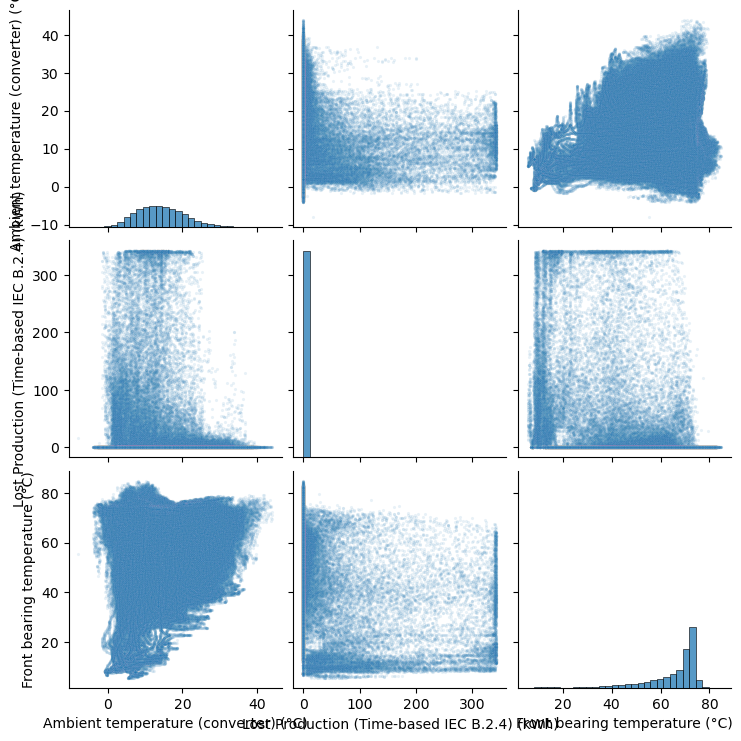

In [7]:
# Vorbedingung: 'df' ist Ihr DataFrame mit vielen Datenpunkten

# Wählen Sie 5 zufällige Spalten aus dem DataFrame
random_columns = np.random.choice(df.columns, 3, replace=False)
subset_df = df[random_columns]

# Erstellen des Pairplots mit angepassten Punktgrößen und erhöhter Transparenz
sns.pairplot(subset_df, 
             plot_kws={'alpha': 0.1, 's': 5},    # 's' kontrolliert die Größe der Punkte, 'alpha' deren Transparenz
             diag_kws={'bins': 30})  # 'bins' für die Histogramme, kann angepasst werden, um die Lesbarkeit zu verbessern

plt.show()


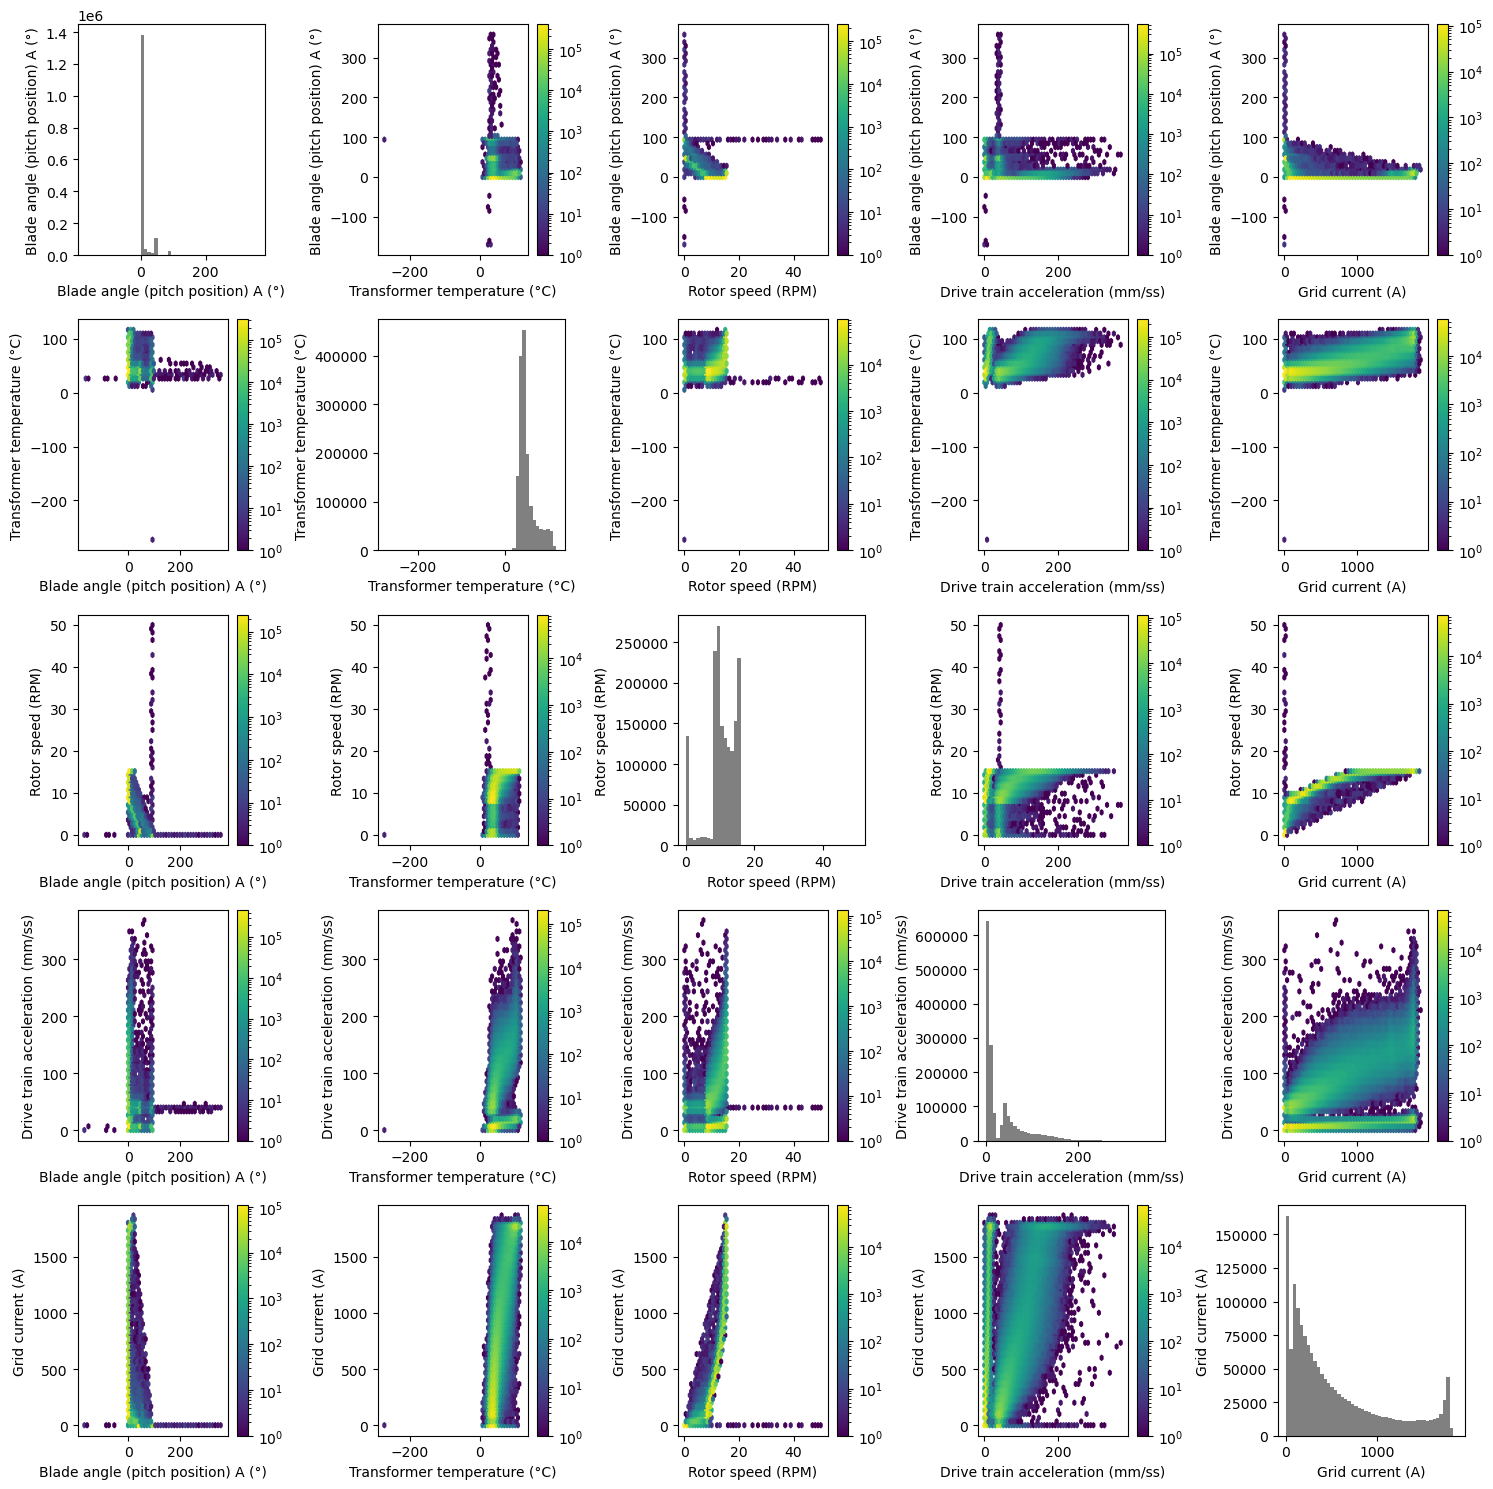

In [5]:
# Wählen Sie 5 zufällige Features aus
features = np.random.choice(df.columns, 5, replace=False)

# Erstellen Sie eine Matrix von Hexbin-Plots
n_features = len(features)
fig, axs = plt.subplots(nrows=n_features, ncols=n_features, figsize=(15, 15))

for i in range(n_features):
    for j in range(n_features):
        ax = axs[i, j]
        if i == j:
            # Diagonale: Histogramm
            df_feature_ij = df[features[i]].dropna()
            ax.hist(df_feature_ij, bins=50, color='gray')
        else:
            # Außerhalb der Diagonale: Hexbin Plot
            # Entfernen von NaN-Werten aus beiden Spalten gleichzeitig
            df_features_ij = df[[features[j], features[i]]].dropna()  # Korrigierte Zeile
            hb = ax.hexbin(df_features_ij[features[j]], df_features_ij[features[i]], gridsize=50, cmap='viridis', mincnt=1, bins='log')
            fig.colorbar(hb, ax=ax)
        
        ax.set(xlabel=features[j], ylabel=features[i])
        
plt.tight_layout()
plt.show()


In [4]:
# Wählen Sie n zufällige Features aus
features = np.random.choice(df.columns, 2, replace=False)
n_features = len(features)

# Erstellen Sie eine Matrix von Plots
fig, axs = plt.subplots(nrows=n_features, ncols=n_features, figsize=(15, 15))

for i in range(n_features):
    for j in range(n_features):
        ax = axs[i][j]
        if i == j:
            # Diagonale: Histogramm oder KDE-Plot für die Verteilung eines Features
            sns.histplot(df[features[i]], bins=30, kde=True, color="skyblue", ax=ax)
        else:
            # Außerhalb der Diagonale: KDE-Plot für paarweise Beziehung zwischen Features
            sns.kdeplot(x=df[features[j]], y=df[features[i]], ax=ax, cmap="Reds", shade=True)
        
        ax.set(xlabel=features[j], ylabel=features[i])

plt.tight_layout()
plt.show()


/var/folders/bm/0j4cpchs2qx9r4_5l3k5pd5c0000gn/T/ipykernel_1911/3793975230.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[features[j]], y=df[features[i]], ax=ax, cmap="Reds", shade=True)


In [63]:
years  = ["2016_3082","2017_3083","2018_3084","2019_3085","2020_3086","2021_3087"]

folderheader = "5841834/Kelmarsh_SCADA_"
turbine_data_header = "/Turbine_Data_Kelmarsh"
status_header = "/Status_Kelmarsh"

def process_files(years, folderheader, keyword):
    dataframes = []
    for year in years:
        # List all files in the directory for the given year
        files = os.listdir(folderheader + year)
        # Filter files based on the keyword
        filtered_files = [file for file in files if keyword in file]
        
        for filename in filtered_files:
            # Extract the turbine number from the filename
            turbine_number = filename.split('_')[-5]
            # Construct the full file path
            filepath = os.path.join(folderheader+year, filename)
            # Read the CSV file
            df = pd.read_csv(filepath, header=9)
            # Add a column for the turbine number
            df['Turbine'] = turbine_number
            # Append the dataframe to the list
            dataframes.append(df)
    
    # Concatenate all dataframes into one and reset the index
    return pd.concat(dataframes, ignore_index=True)

# Usage

status_df = process_files(years, folderheader, 'Status')
turbine_df = process_files(years, folderheader, 'Turbine')

In [64]:
df = turbine_df[["# Date and time", "Turbine", 'Long Term Wind (m/s)', 'Potential power reference turbines (kW)', 'Energy Export (kWh)', 
                  'Available Capacity for Production (kW)', 'Time-based System Avail.', 'Energy Import (kWh)', 
                  'Power (kW)', 'Grid frequency (Hz)', 'Grid voltage (V)', 'Apparent power (kVA)', 
                  'Reactive power (kvar)', 'Wind speed (m/s)', 'Lost Production (Time-based IEC B.2.4) (kWh)', 
                  'Voltage L2 / V (V)', 'Voltage L1 / U (V)', 'Voltage L3 / W (V)', 'Current L1 / U (A)', 
                  'Current L2 / V (A)', 'Current L3 / W (A)', 'Temp. top box (°C)', 'Wind direction (°)', 
                  'Rotor bearing temp (°C)', 'Hub temperature (°C)', 'Generator RPM (RPM)', 
                  'Stator temperature 1 (°C)', 'Grid current (A)', 'Generator bearing rear temperature (°C)', 
                  'Nacelle position (°)', 'Generator bearing front temperature (°C)', 
                  'Ambient temperature (converter) (°C)', 'Rotor speed (RPM)', 'Drive train acceleration (mm/ss)', 
                  'Blade angle (pitch position) C (°)', 'Nacelle ambient temperature (°C)', 
                  'Blade angle (pitch position) A (°)', 'Gear oil temperature (°C)', 
                  'Transformer cell temperature (°C)', 'Gear oil inlet temperature (°C)', 'Gearbox speed (RPM)', 
                  'Front bearing temperature (°C)', 'Yaw bearing angle (°)', 'Blade angle (pitch position) B (°)', 
                  'Nacelle temperature (°C)', 'Transformer temperature (°C)', 'Rear bearing temperature (°C)', 
                  'Energy Export counter (kWh)']]

In [65]:
df.rename(columns={"# Date and time": 'timestamp'}, inplace=True)

/var/folders/bm/0j4cpchs2qx9r4_5l3k5pd5c0000gn/T/ipykernel_4538/3186368419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"# Date and time": 'timestamp'}, inplace=True)


In [128]:
relevant_errors = pd.read_csv('temp_csvs/relevant_errors.csv') 

# a) Timestamp in einen echten datetime umwandeln
relevant_errors['Timestamp start'] = pd.to_datetime(relevant_errors['Timestamp start'])

# b) Einträge in "Turbine" in int umwandeln
# Dieser Schritt prüft auch, ob die Umwandlung erforderlich ist.
if relevant_errors['Turbine'].dtype != 'int':
    relevant_errors['Turbine'] = relevant_errors['Turbine'].astype(int)

# c) Duplikate löschen, wobei Duplikate definiert sind als Einträge mit identischer Turbine, Datum und Nachricht
relevant_errors.drop_duplicates(subset=['Timestamp start', 'Turbine', 'Message'], keep='first', inplace=True)

# Ergebnis ausgeben oder in eine Datei schreiben
print(relevant_errors)
relevant_errors.to_csv('temp_csvs/relevant_errors_clean.csv', index=False) # optional: DataFrame in eine neue Datei schreiben


        Timestamp start  Turbine                    Message
0   2016-01-14 19:28:05        1   Overload generator fan 1
1   2016-01-14 19:28:05        1   Overload generator fan 2
2   2016-01-14 19:28:05        1   Overload generator fan 3
3   2016-01-24 16:51:17        1  Frequency converter error
4   2016-03-01 18:35:40        1  Frequency converter error
..                  ...      ...                        ...
246 2020-01-30 11:48:09        6   Overload generator fan 2
247 2020-01-30 11:47:34        6   Overload generator fan 3
248 2020-07-15 08:14:59        6   Overload generator fan 1
249 2021-01-20 12:25:16        6   Overload generator fan 1
250 2021-05-27 06:40:45        6   Overload generator fan 1

[251 rows x 3 columns]


In [129]:
# Funktion zum Runden des Timestamps auf die nächsten vollen 10 Minuten zurück  
def round_down_time(dt):  
    # Runde Minuten auf die nächsten vollen 10 Minuten ab  
    new_minute = (dt.minute // 10) * 10  
    # Erstelle einen neuen Timestamp ohne die überschüssigen Minuten und Sekunden  
    return dt.replace(minute=new_minute, second=0, microsecond=0)

# Funktion, um Zeilen für jeden Fehler rückwirkend zu generieren (von -48 bis -24 Stunden)  
def extrapolate_rows(row):  
    new_rows = []  
    # Endzeit wird um 24 Stunden zurückgesetzt und dann auf die nächsten vollen 10 Minuten abgerundet  
    end_time = round_down_time(row['Timestamp start'] - pd.Timedelta(days=1))  
    # Startzeit wird um 48 Stunden von der ursprünglichen Zeit zurückgesetzt und rundet diese auf die nächsten vollen 10 Minuten ab  
    start_time = round_down_time(row['Timestamp start'] - pd.Timedelta(days=2))  
    # Zeitreihe wird zwischen Start- und Endzeit mit 10-Minuten-Schritten generiert  
    time_range = pd.date_range(start=start_time, end=end_time, freq='10T')[:-1]  # Entfernt den letzten Zeitpunkt, um Duplikate zu vermeiden

    for time in time_range:  
        new_row = row.copy()  
        new_row['Timestamp start'] = time  
        new_rows.append(new_row)  
    
    return pd.DataFrame(new_rows)

# Anwenden der Funktion auf jeden Fehler im DataFrame  
extrapolated_rows = pd.concat([extrapolate_rows(row) for index, row in relevant_errors.iterrows()], ignore_index=True)

# Ergebnis ausgeben  
# Angenommen, Sie wollen die Spalte "Timestamp" löschen, aber stellen Sie sicher, dass diese in Ihrem DataFrame existiert, bevor Sie das versuchen.
extrapolated_rows = extrapolated_rows.drop(columns=["Timestamp"]) if "Timestamp" in extrapolated_rows.columns else extrapolated_rows
extrapolated_rows


,Timestamp start,Turbine,Message
0,2016-01-12 19:20:00,1,Overload generator fan 1
1,2016-01-12 19:30:00,1,Overload generator fan 1
2,2016-01-12 19:40:00,1,Overload generator fan 1
3,2016-01-12 19:50:00,1,Overload generator fan 1
4,2016-01-12 20:00:00,1,Overload generator fan 1
...,...,...,...
36139,2021-05-26 05:50:00,6,Overload generator fan 1
36140,2021-05-26 06:00:00,6,Overload generator fan 1
36141,2021-05-26 06:10:00,6,Overload generator fan 1
36142,2021-05-26 06:20:00,6,Overload generator fan 1


In [130]:
extrapolated_rows.rename(columns={"Timestamp start": "timestamp"}, inplace=True)


In [131]:
relevant_errors=extrapolated_rows

In [132]:
relevant_errors.to_csv("relevant_errors_v2.csv")

In [135]:
df

,timestamp,Turbine,Long Term Wind (m/s),Potential power reference turbines (kW),Energy Export (kWh),Available Capacity for Production (kW),Time-based System Avail.,Energy Import (kWh),Power (kW),Grid frequency (Hz),...,Transformer cell temperature (°C),Gear oil inlet temperature (°C),Gearbox speed (RPM),Front bearing temperature (°C),Yaw bearing angle (°),Blade angle (pitch position) B (°),Nacelle temperature (°C),Transformer temperature (°C),Rear bearing temperature (°C),Energy Export counter (kWh)
0,2016-01-03 00:00:00,5,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-03 00:10:00,5,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03 00:20:00,5,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-03 00:30:00,5,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-03 00:40:00,5,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733179,2021-06-30 23:10:00,4,5.3,69.078587,8.0,2050.0,1.0,0.0,62.040001,49.939999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1733180,2021-06-30 23:20:00,4,5.3,120.135275,19.0,2050.0,1.0,0.0,104.099998,49.970001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1733181,2021-06-30 23:30:00,4,5.3,162.238598,17.0,2050.0,1.0,0.0,107.620003,49.970001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1733182,2021-06-30 23:40:00,4,5.3,124.528406,10.0,2050.0,1.0,0.0,55.610001,49.950001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:

# Erzeugen eines Indikator-DataFrames für die Fehlermeldungen (get_dummies erstellt eine neue Spalte für jede einzigartige Fehlermeldung)
error_dummies = relevant_errors.pivot_table(index=['timestamp', 'Turbine'], 
                                            columns='Message', 
                                            aggfunc=len, 
                                            fill_value=0).reset_index()

error_dummies

Message,timestamp,Turbine,Frequency converter error,Overload generator fan 1,Overload generator fan 2,Overload generator fan 3,Pitch run-away (hub box v.>=4)
0,2016-01-12 19:20:00,1,0,1,1,1,0
1,2016-01-12 19:30:00,1,0,1,1,1,0
2,2016-01-12 19:40:00,1,0,1,1,1,0
3,2016-01-12 19:50:00,1,0,1,1,1,0
4,2016-01-12 20:00:00,1,0,1,1,1,0
...,...,...,...,...,...,...,...
16827,2021-05-26 05:50:00,6,0,1,0,0,0
16828,2021-05-26 06:00:00,6,0,1,0,0,0
16829,2021-05-26 06:10:00,6,0,1,0,0,0
16830,2021-05-26 06:20:00,6,0,1,0,0,0


In [137]:

# Durchführen des 'left' Merges mit df
df_with_errors = pd.merge(df, error_dummies, on=['timestamp', 'Turbine'], how='left')

In [143]:
print(df.shape, error_dummies.shape, df_with_errors.shape)

(1733184, 48) (16832, 7) (1733184, 53)


In [142]:
df_with_errors.to_csv("df_with_errors.csv")

# START HERE for our last steps with UMAP :)

In [10]:
df_with_errors = pd.read_csv("df_with_errors.csv")
df_with_errors=df_with_errors.drop(columns=["Unnamed: 0"])


# Fehlermeldungsspalten, für die NaN-Werte ersetzt werden sollen
error_columns = [
    "Frequency converter error",
    "Overload generator fan 1",
    "Overload generator fan 2",
    "Overload generator fan 3",
    "Pitch run-away (hub box v.>=4)"
]

# Ersetzen von NaN-Werten mit 0 in den spezifizierten Fehlermeldungsspalten
df_with_errors[error_columns] = df_with_errors[error_columns].fillna(0)


for column in df_with_errors.select_dtypes(include=[np.number]).columns:
    df_with_errors[column].fillna(df_with_errors[column].median(), inplace=True)


#downsampling

# Zuerst sicherstellen, dass 'timestamp' im richtigen Format ist
# df_with_errors['timestamp'] = pd.to_datetime(df_with_errors['timestamp'])

# Gruppierung nach stündlichen Intervallen und Berechnung des Medians pro Gruppe
# df_resampled = df_with_errors.resample('3H', on='timestamp').median().reset_index()

# oder fix jeden n-ten eintrag
samplefactor=18
df_resampled = df_with_errors.iloc[::samplefactor].copy()


error_columns = [
    "Frequency converter error",
    "Overload generator fan 1",
    "Overload generator fan 2",
    "Overload generator fan 3",
    "Pitch run-away (hub box v.>=4)"
]
df = df_resampled.drop(columns = error_columns)
df= df.drop(columns=["Turbine", "timestamp"])



# Skalieren der numerischen Daten
scaler = StandardScaler()  
data_scaled = scaler.fit_transform(df)

# Dimensionsreduktion mit UMAP
umap_embeddings = umap.UMAP(n_neighbors=25, n_components=2, min_dist=0.2, metric='euclidean', verbose=True).fit_transform(data_scaled)


UMAP(min_dist=0.2, n_neighbors=25, verbose=True)
Sun Apr 28 01:31:23 2024 Construct fuzzy simplicial set
Sun Apr 28 01:31:23 2024 Finding Nearest Neighbors
Sun Apr 28 01:31:23 2024 Building RP forest with 21 trees
Sun Apr 28 01:31:23 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Sun Apr 28 01:31:25 2024 Finished Nearest Neighbor Search
Sun Apr 28 01:31:25 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sun Apr 28 01:31:55 2024 Finished embedding


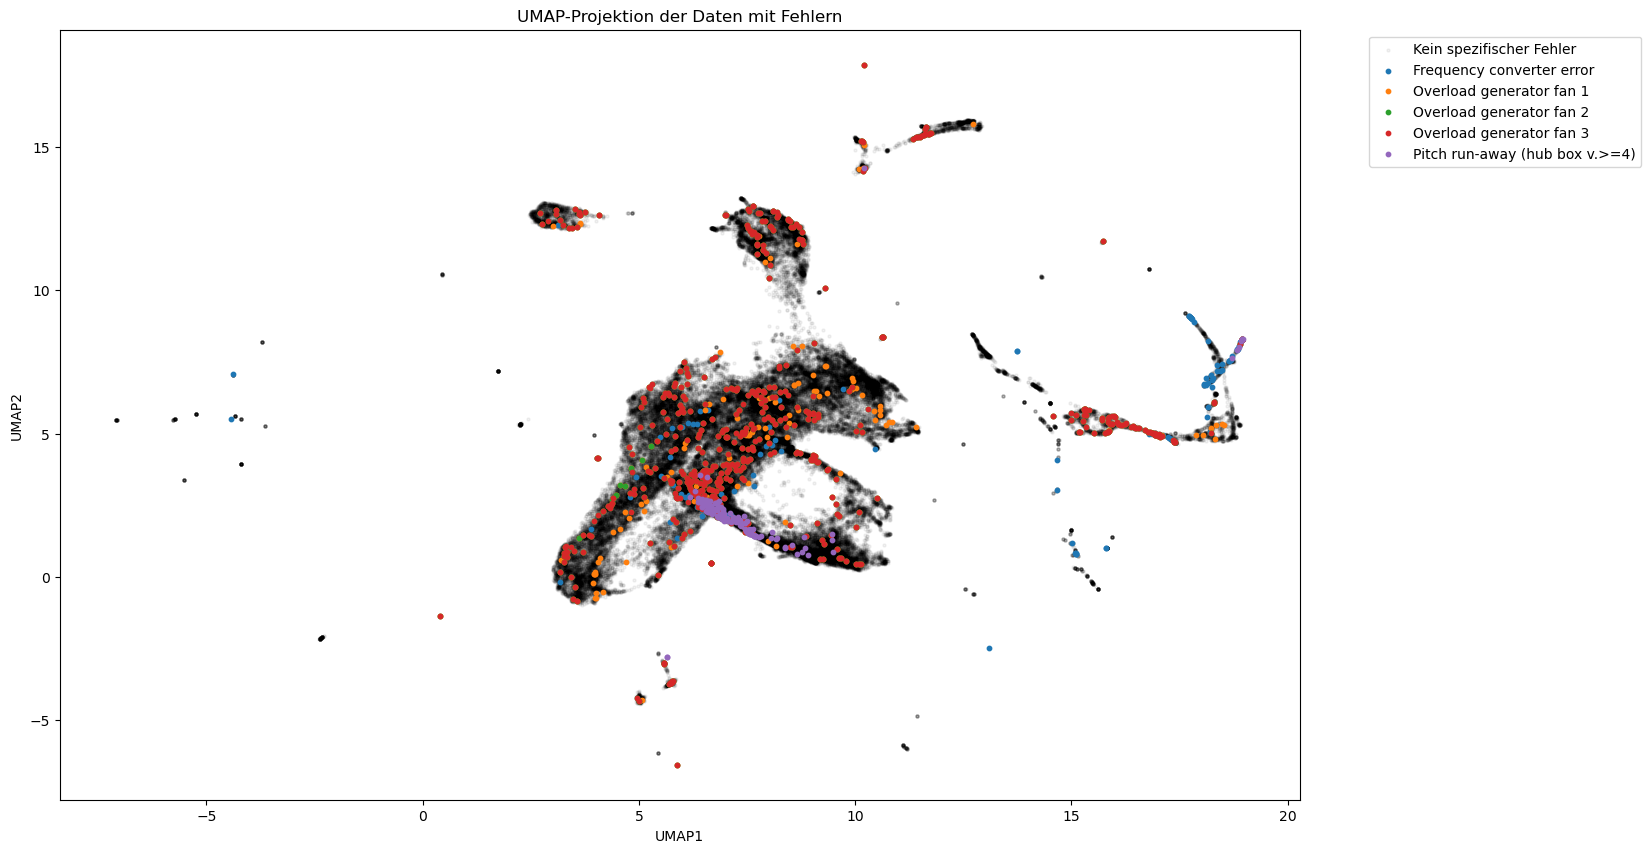

In [21]:
import matplotlib.pyplot as plt

# Figur initialisieren  
plt.figure(figsize=(16, 10))

# Plot der Grunddaten 
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], alpha=0.05, label='Kein spezifischer Fehler', s=5, color='black')

# Plot der Fehlerdaten
for error in error_columns:  
    mask = df_resampled[error] == 1  
    selected_embeddings = umap_embeddings[mask.values]  
    if len(selected_embeddings) > 0:  
        plt.scatter(selected_embeddings[:, 0], selected_embeddings[:, 1], label=error, s=10, alpha=1)

# Anpassungen des Plots  
plt.title('UMAP-Projektion der Daten mit Fehlern')  
plt.xlabel('UMAP1')  
plt.ylabel('UMAP2')  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legende außerhalb des Plots positionieren  

# Speichern des Plots als PNG
plt.savefig('umap_projektion_mit_fehlern.png', bbox_inches='tight', dpi=600)

# Nach dem Speichern können Sie plt.show() aufrufen, wenn Sie es auch anzeigen möchten (optional und nicht nötig, wenn Sie nur die Datei wollen)
plt.show()


In [17]:
# Dimensionsreduktion mit UMAP auf 3 Komponenten
umap_embeddings = umap.UMAP(n_neighbors=25, n_components=3, min_dist=0.1, metric='euclidean', verbose=True).fit_transform(data_scaled)

UMAP(n_components=3, n_neighbors=25, verbose=True)
Sun Apr 28 01:35:33 2024 Construct fuzzy simplicial set
Sun Apr 28 01:35:33 2024 Finding Nearest Neighbors
Sun Apr 28 01:35:33 2024 Building RP forest with 21 trees
Sun Apr 28 01:35:33 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Sun Apr 28 01:35:34 2024 Finished Nearest Neighbor Search
Sun Apr 28 01:35:34 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sun Apr 28 01:35:58 2024 Finished embedding


In [22]:
import plotly.graph_objects as go

# Hier setzen wir an, nachdem Sie die UMAP-Auswertung durchgeführt haben.

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=umap_embeddings[:, 0],
                           y=umap_embeddings[:, 1],
                           z=umap_embeddings[:, 2],
                           mode='markers',
                           marker=dict(size=3, color='black', opacity=0.1),
                           name='Daten'))

for error in error_columns:  
    mask = df_resampled[error] == 1
    if mask.sum() > 0:
        selected_embeddings = umap_embeddings[mask.values]
        fig.add_trace(go.Scatter3d(x=selected_embeddings[:, 0],
                                   y=selected_embeddings[:, 1],
                                   z=selected_embeddings[:, 2],
                                   mode='markers',
                                   marker=dict(size=6, opacity=1),
                                   name=f'Fehler: {error}'))

fig.update_layout(margin=dict(l=0, r=0, b=0, t=30),
                  title='3D UMAP-Projektion der Daten mit Fehlern',
                  scene=dict(
                      xaxis_title='UMAP1',
                      yaxis_title='UMAP2',
                      zaxis_title='UMAP3'
                  ))

# Hier speichern wir die Figur als eine HTML-Datei
fig.write_html('3d_umap_visualization.html')
